In [7]:
import os
from neurochat.nc_data import NData
import numpy as np
from neurochat.nc_spatial import NSpatial
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# Load the data
def load_data():
    dir_ = r'D:\SubRet_recordings_imaging\CSubRet1\CSubRet1_recording\CSR1_small sq\04092017'
    spike_file = os.path.join(dir_, "04092017_CSubRet1_smallsq_d2_1.3")
    pos_file = os.path.join(dir_, "04092017_CSubRet1_smallsq_d2_1_3.txt")
    lfp_file = os.path.join(dir_, "04092017_CSubRet1_smallsq_d2_1.eeg")
    unit_no = 5
    ndata = NData()
    ndata.set_spike_file(spike_file)
    ndata.set_spatial_file(pos_file)
    ndata.set_lfp_file(lfp_file)
    ndata.load()
    ndata.set_unit_no(unit_no)

    return ndata


ndata = load_data()

In [9]:
# Place field stuff
bin_size = 3 # how big a bin is in cm
# If neurochat cutting away data set chop_bound to 0
chop_bound = 5
filter_ = ("b", 5)

firing_rate_needed_for_place_field = 0.2
min_place_field_neighbours = 4

# Calculates place field after smoothing if True
smooth_place = False

kwargs = {
    "pixel": bin_size,
    "chop_bound": chop_bound,
    "filter": filter_,
    "fieldThresh": firing_rate_needed_for_place_field,
    "minPlaceFieldNeighbours": min_place_field_neighbours,
    "smoothPlace": smooth_place,

}
place_data = ndata.place(**kwargs)

(3, 3)
1803.0
15.5
1864
51.936472555029255


In [10]:
# Inspect what you have at this point
from pprint import pprint
pprint("Place data:\n"+ str(place_data.keys()))
pprint("Place results:\n"+ str(ndata.get_results().keys()))
place_results = ndata.get_results()

('Place data:\n'
 "dict_keys(['posX', 'posY', 'fmap', 'smoothMap', 'firingMap', 'tmap', "
 "'xedges', 'yedges', 'spikeLoc', 'placeField', 'largestPlaceGroup', "
 "'placeBoundary', 'indicesInPlaceField', 'centroid', 'spikeCounts'])")
('Place results:\n'
 "odict_keys(['Spatial Skaggs', 'Spatial Sparsity', 'Spatial Coherence', 'Peak "
 "Firing Rate', 'Found strong place field', 'Place field Centroid x', 'Place "
 "field Centroid y', 'Place field Boundary x', 'Place field Boundary y', "
 "'Number of Spikes in Place Field', 'Percentage of Spikes in Place Field'])")


Found a place field


Text(0.5, 1.0, 'Firing Map')

Text(0.5, 1.0, 'Smooth Firing Map')

Text(0.5, 1.0, 'Place fields')

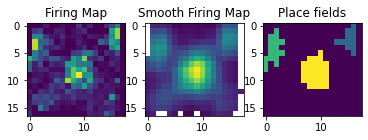

In [11]:
# Inspect the output

# 1. Were at least X bins found with high firing rate
if place_results["Found strong place field"]:
    print("Found a place field")
else:
    print("No strong place field found (> x bins with high firing rate)")

# Firing map stuff
firing_map = place_data["firingMap"]
smoothed_firing_map = place_data["smoothMap"]

# Place field stuff
largest_place_field_number = place_data["largestPlaceGroup"]
place_fields = place_data["placeField"]

fig, axes = plt.subplots(1, 3)
# 1 Firing map
axes[0].imshow(firing_map)
axes[0].set_title("Firing Map")

# 2 Smooth map
axes[1].imshow(smoothed_firing_map)
axes[1].set_title("Smooth Firing Map")

# 3 Place field
axes[2].imshow(place_fields)
axes[2].set_title("Place fields")


In [12]:
print(place_fields.shape)
pprint(place_fields)
print(largest_place_field_number)
print(
    np.array(place_results["Place field Boundary x"]) / bin_size, 
    np.array(place_results["Place field Boundary y"]) / bin_size
)
pprint(np.array(np.where(place_fields == largest_place_field_number)))

(17, 18)
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0],
       [2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
# Assume multiple place fields
tmap = place_data["tmap"]

# How many place fields
num_place_fields = np.unique(place_fields).size - 1
# num_place_fields = 1
print(f"num_place_fields: {num_place_fields}")

place_field_results = {}

if smooth_place:
    pmap = smoothed_firing_map
else:
    pmap = firing_map

pmap[tmap == 0] = None
spike_counts = place_data["spikeCounts"].astype(int)

# print("Place fields")
# print(place_fields)

# print("Spike counts:")
# print(spike_counts)

# print("\nSpike count shape")
# pprint(spike_counts.shape)

for i in range(1, num_place_fields + 1):
    centroid = NSpatial.place_field_centroid(place_fields, pmap, i)
    centroid = centroid * bin_size + (bin_size * 0.5)
    # flip x and y
    centroid = centroid[::-1]
    bins_in_place_field = np.array(np.where(place_fields == i))
    # print("\nBins in place field:")
    # pprint(bins_in_place_field)
    
    place_field_size = bins_in_place_field.size

    # Our own code - TODO update NC
    spike_counts_place_field = spike_counts[
        bins_in_place_field[0], bins_in_place_field[1]]
    # print("\nSpike counts in place field:")
    # pprint(spike_counts_place_field)

    number_of_spikes_in_place_field = np.sum(spike_counts_place_field)

    max_firing_rate_in_place_field = pmap[
        bins_in_place_field[0], bins_in_place_field[1]].max()

    results = {
        "centroid" : centroid, # this in cm,
        "place_field_size" : place_field_size, # this not in cm
        "number_of_spikes_in_place_field": number_of_spikes_in_place_field,
        "max_firing_rate_in_place_field": max_firing_rate_in_place_field,
    }

    place_field_results[i] = results

pprint(place_field_results)

num_place_fields: 3
{1: {'centroid': array([47.75709237,  8.5622741 ]),
     'max_firing_rate_in_place_field': 12.941176470588236,
     'number_of_spikes_in_place_field': 144,
     'place_field_size': 24},
 2: {'centroid': array([ 5.34198397, 14.55537619]),
     'max_firing_rate_in_place_field': 14.0,
     'number_of_spikes_in_place_field': 129,
     'place_field_size': 34},
 3: {'centroid': array([28.40953871, 26.76468066]),
     'max_firing_rate_in_place_field': 15.5,
     'number_of_spikes_in_place_field': 1803,
     'place_field_size': 56}}
